In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
dataset=pd.read_csv("CreditCardData.csv")

In [3]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
dataset=dataset.drop(["ID"],axis=1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_1                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [6]:
dataset["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [7]:
dataset["EDUCATION"]=dataset["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [8]:
dataset["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
dataset["MARRIAGE"]=dataset["MARRIAGE"].map({0:3,1:1,2:2,3:3})
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
#basically merged all the unknown values

In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
Scale = RobustScaler()
#we have to remove 1st column b4 standardising data
x= dataset.drop("default.payment.next.month",axis=1)
y=dataset["default.payment.next.month"]
x=Scale.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_Train , x_Test, y_Train, y_Test= train_test_split(x,y,test_size=0.1,random_state=42,stratify=y)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
#1st LR model
LR = LogisticRegression()
LR.fit(x_Train,y_Train)
LRpred = LR.predict(x_Test)

In [15]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,precision_recall_curve

In [16]:
LR_score = [accuracy_score(y_pred=LRpred, y_true=y_Test),precision_score(y_pred=LRpred, y_true=y_Test),recall_score(y_pred=LRpred, y_true=y_Test)]

In [17]:
LR_score

[0.8116666666666666, 0.72, 0.24397590361445784]

In [18]:
#2nd Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_Train,y_Train)
DTCpred = DTC.predict(x_Test)
DTC_score = [accuracy_score(y_pred=DTCpred, y_true=y_Test),precision_score(y_pred=DTCpred, y_true=y_Test),recall_score(y_pred=DTCpred, y_true=y_Test)]

In [19]:
DTC_score

[0.7256666666666667, 0.3804511278195489, 0.3810240963855422]

In [20]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_Train,y_Train)
GNBpred = GNB.predict(x_Test)
GNB_score = [accuracy_score(y_pred=GNBpred, y_true=y_Test),precision_score(y_pred=GNBpred, y_true=y_Test),recall_score(y_pred=GNBpred, y_true=y_Test)]

In [21]:
GNB_score

[0.729, 0.41804180418041803, 0.572289156626506]

In [22]:
metrics=np.vstack((LR_score,DTC_score,GNB_score)).T

In [23]:
index=['accuracy','precision','recall']
metrics=pd.DataFrame({'LR':LR_score,'DTC':DTC_score,'GNB':GNB_score},index=index)
metrics=metrics*100

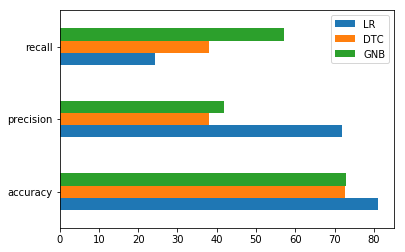

In [24]:
metrics.plot(kind='barh')

In [25]:
#plot precison recall curve to decide precision/recall tradeoff
#if company cant afford more defaults(less risk) then choose a model with high precision
#after adjusting precision we can select our model